In [131]:
import pandas as pd
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings("ignore")

In [132]:
raw_data = pd.read_csv('data/feature_data.csv')

In [133]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) 

In [134]:
data = raw_data.drop(columns=['ID'])
data

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Living_With,Family_Size,Is_Parent
0,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,67,1617,0,0,1,0
1,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,70,27,2,0,3,1
2,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,59,776,0,1,2,0
3,2,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139,40,53,1,1,3,1
4,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161,43,422,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,2,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,381,57,1341,1,1,3,1
2208,4,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,19,78,444,3,1,5,1
2209,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,155,43,1241,0,0,1,0
2210,3,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,156,68,843,1,1,3,1


In [135]:
data.describe()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Living_With,Family_Size,Is_Parent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,2.460669,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,2.324593,4.088156,2.672242,5.806510,5.321429,0.073689,0.074141,0.072785,0.064195,0.013562,0.009042,0.150542,353.714286,55.086347,607.268083,0.947559,0.645570,2.593128,0.714286
std,1.004193,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,1.924507,2.742187,2.927542,3.250939,2.425597,0.261323,0.262060,0.259842,0.245156,0.115691,0.094678,0.357683,202.494886,11.701599,602.513364,0.749466,0.478449,0.906236,0.451856
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,47.000000,69.000000,0.000000,0.000000,2.000000,0.000000
50%,2.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,356.000000,54.000000,397.000000,1.000000,1.000000,3.000000,1.000000
75%,3.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,529.000000,65.000000,1048.000000,1.000000,1.000000,3.000000,1.000000
max,4.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,699.000000,84.000000,2525.000000,3.000000,1.000000,5.000000,1.000000


In [136]:
def apply_scaler(data, scaler):  
    scaled_data = scaler.fit_transform(data)
    return scaled_data

In [137]:
data_scaled = apply_scaler(data, MinMaxScaler())
data_scaled

array([[0.5       , 0.35108641, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.27767992, 0.5       , ..., 0.        , 0.5       ,
        1.        ],
       [0.5       , 0.43495553, 0.        , ..., 1.        , 0.25      ,
        0.        ],
       ...,
       [0.5       , 0.34388518, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 0.42021697, 0.        , ..., 1.        , 0.5       ,
        1.        ],
       [1.        , 0.31829187, 0.5       , ..., 1.        , 0.75      ,
        1.        ]])

In [138]:
pca_df = pd.DataFrame(data_scaled)

Elbow Method to determine the number of clusters to be formed:


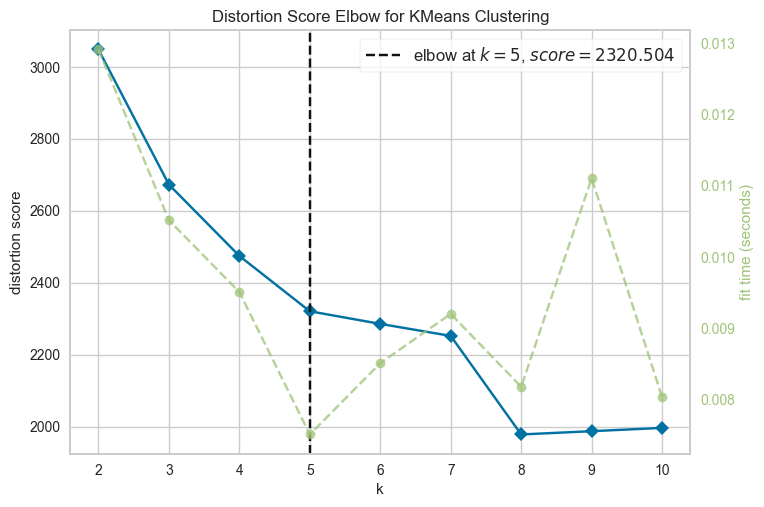

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [139]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_df)
Elbow_M.show()

In [140]:
# Huấn luyện K-Means với k=5
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(pca_df)

# Lấy nhãn cụm (cluster labels)
cluster_labels = kmeans.labels_

# Inertia (WCSS) của mô hình với k=5
print(f"WCSS for k=5: {kmeans.inertia_}")


WCSS for k=5: 2193.8985985154445


In [141]:
# Giả sử dữ liệu gốc là một DataFrame tên là 'original_data'
raw_data['Cluster'] = cluster_labels
raw_data


,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Living_With,Family_Size,Is_Parent,Cluster
0,5524,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,67,1617,0,0,1,0,0
1,2174,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,70,27,2,0,3,1,3
2,4141,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,59,776,0,1,2,0,0
3,6182,2,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139,40,53,1,1,3,1,1
4,5324,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161,43,422,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,2,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,381,57,1341,1,1,3,1,4
2208,4001,4,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,19,78,444,3,1,5,1,1
2209,7270,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,155,43,1241,0,0,1,0,0
2210,8235,3,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,156,68,843,1,1,3,1,4


In [142]:
# Thống kê mô tả theo cụm
cluster_summary = raw_data.groupby('Cluster').mean()
print(cluster_summary)


                  ID  Education        Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Customer_For        Age        Spent  Children  Living_With  Family_Size  Is_Parent
Cluster                                                                                                                                                                                                                                                                                                                                                                                                                                            
0        5631.370518   2.382470  61831.412351  0.000000  0.000000  50.577689  396.061753  50.195219       339.860558        74.5

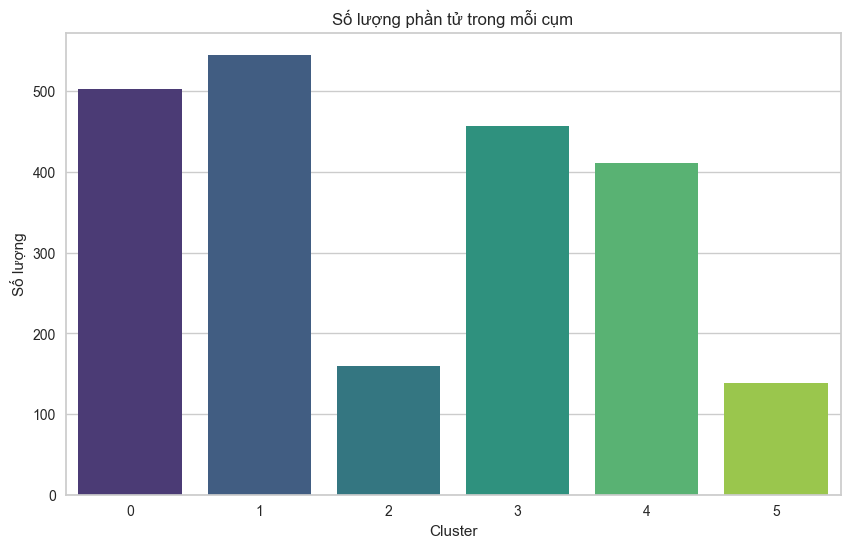

In [143]:
# Biểu đồ phân phối dữ liệu theo cụm
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=raw_data, palette='viridis')
plt.title('Số lượng phần tử trong mỗi cụm')
plt.xlabel('Cluster')
plt.ylabel('Số lượng')
plt.show()


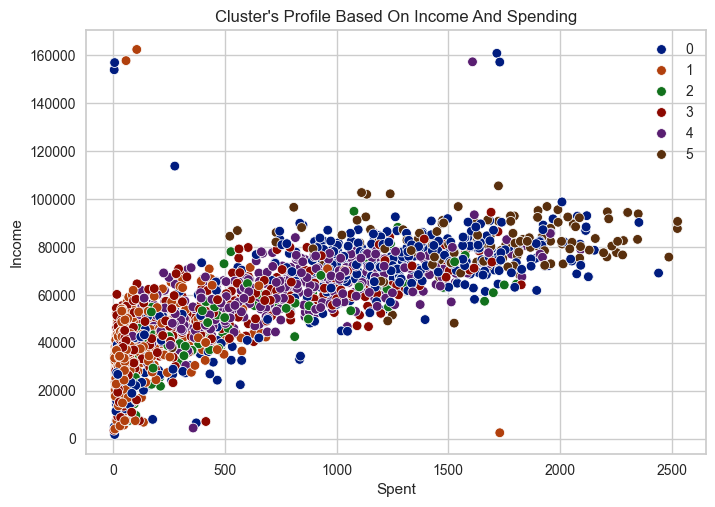

In [144]:
pl = sns.scatterplot(data = raw_data,x=raw_data["Spent"], y=raw_data["Income"],hue=raw_data["Cluster"], palette='dark')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

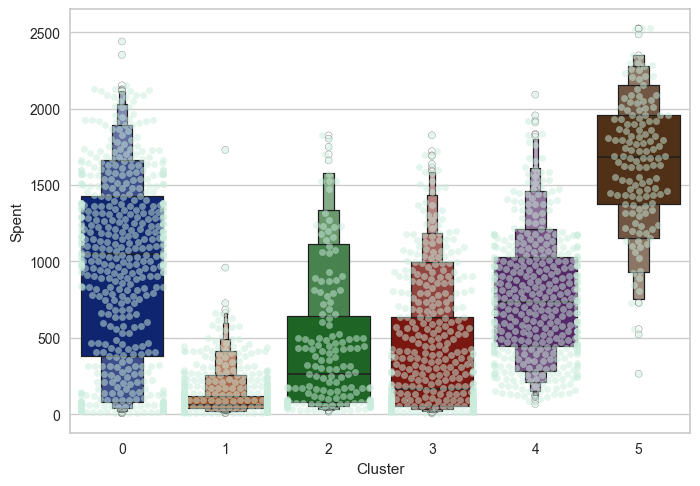

In [145]:
plt.figure()
pl=sns.swarmplot(x=raw_data["Cluster"], y=raw_data["Spent"], color= "#CBEDDD", alpha=0.5, legend=False)
pl=sns.boxenplot(x=raw_data["Cluster"], y=raw_data["Spent"], palette='dark', legend=False)
plt.show()

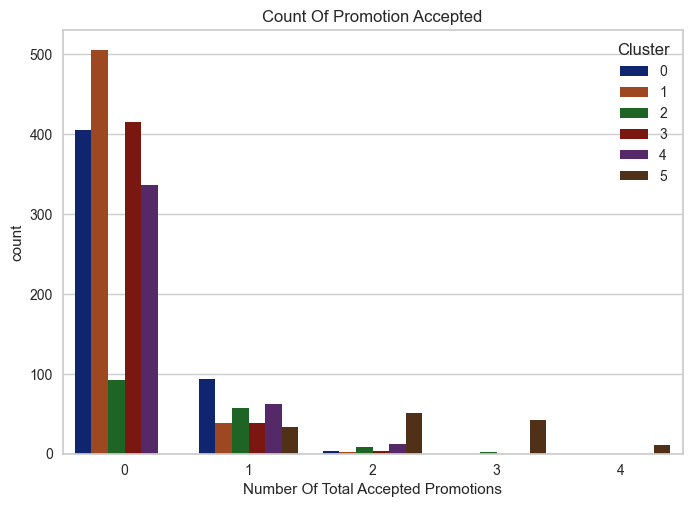

In [146]:
#Creating a feature to get a sum of accepted promotions 
raw_data["Total_Promos"] = raw_data["AcceptedCmp1"]+ raw_data["AcceptedCmp2"]+ raw_data["AcceptedCmp3"]+ raw_data["AcceptedCmp4"]+ raw_data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=raw_data["Total_Promos"],hue=raw_data["Cluster"], palette= 'dark')
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

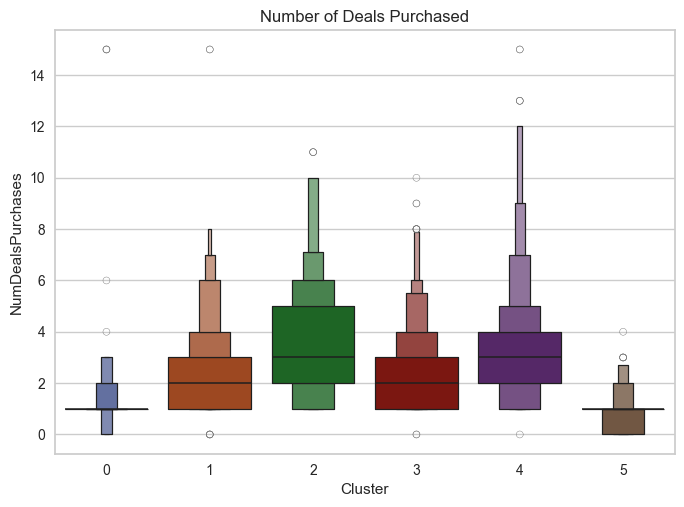

In [147]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=raw_data["NumDealsPurchases"],x=raw_data["Cluster"], palette= 'dark')
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 800x550 with 0 Axes>

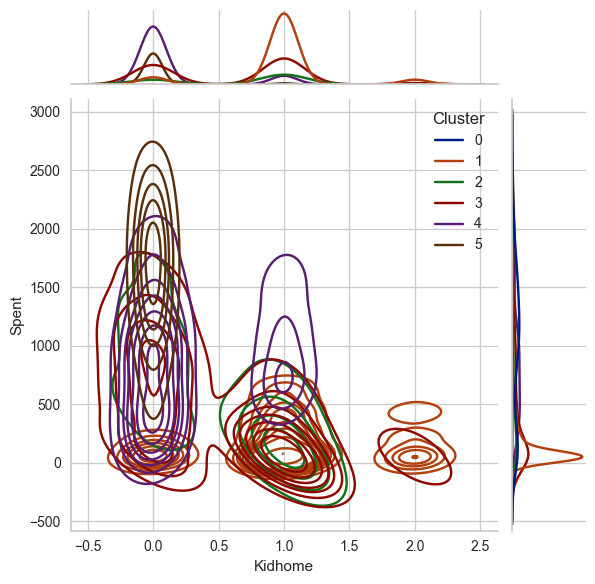

<Figure size 800x550 with 0 Axes>

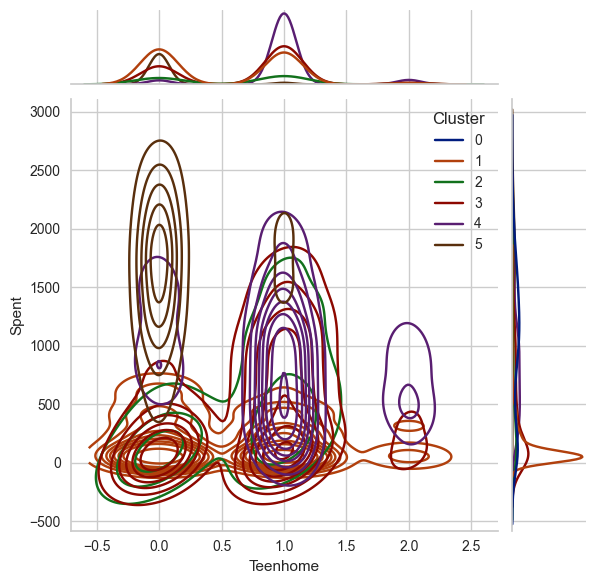

<Figure size 800x550 with 0 Axes>

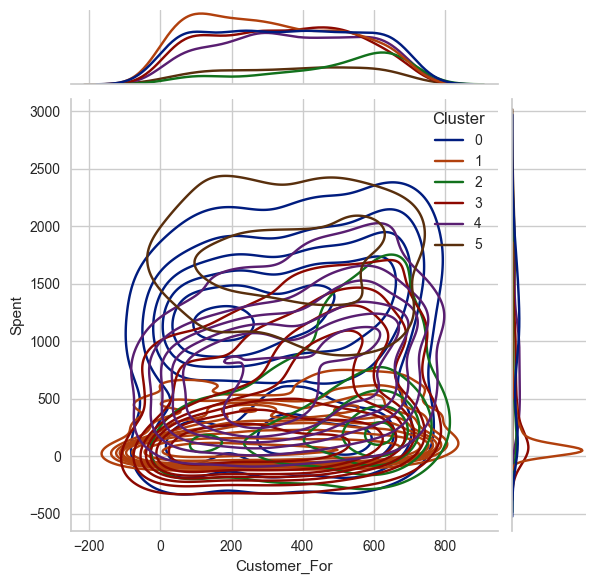

<Figure size 800x550 with 0 Axes>

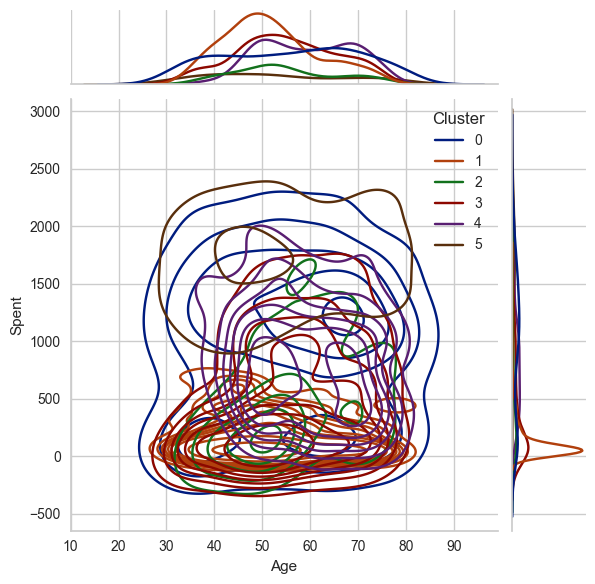

<Figure size 800x550 with 0 Axes>

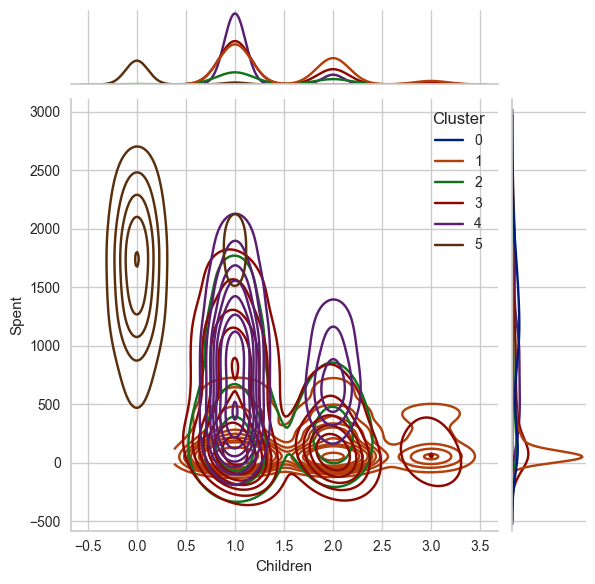

<Figure size 800x550 with 0 Axes>

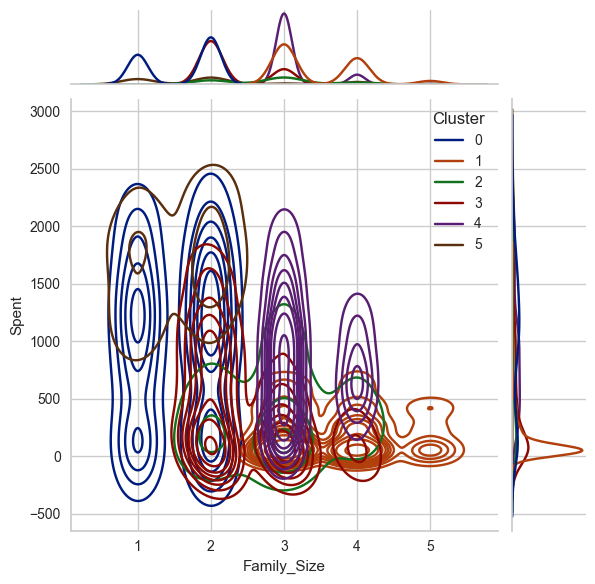

<Figure size 800x550 with 0 Axes>

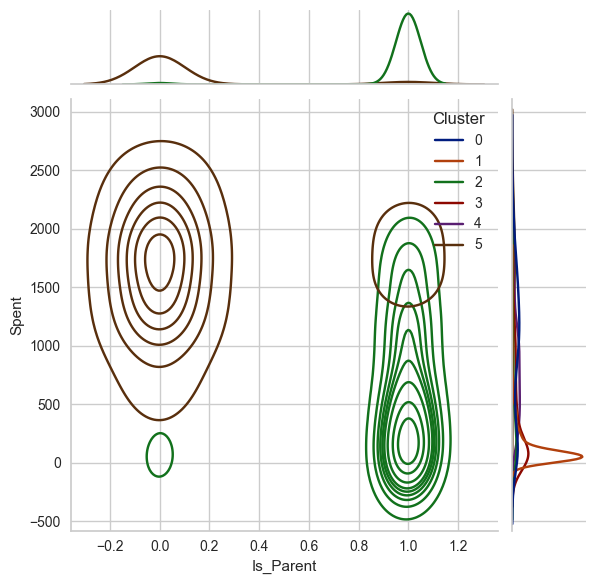

<Figure size 800x550 with 0 Axes>

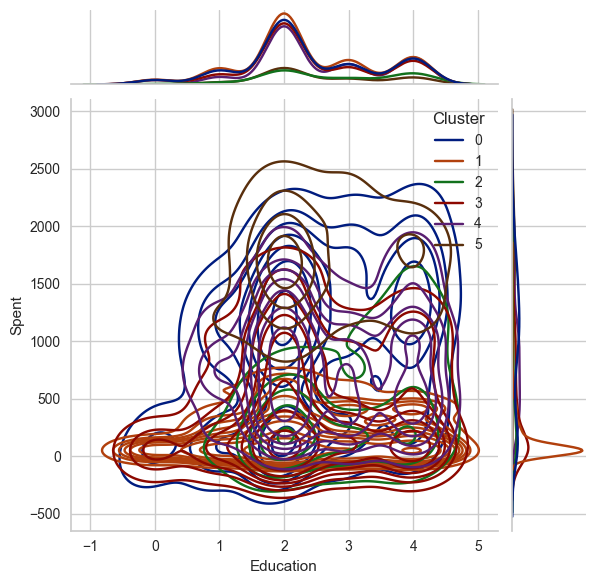

<Figure size 800x550 with 0 Axes>

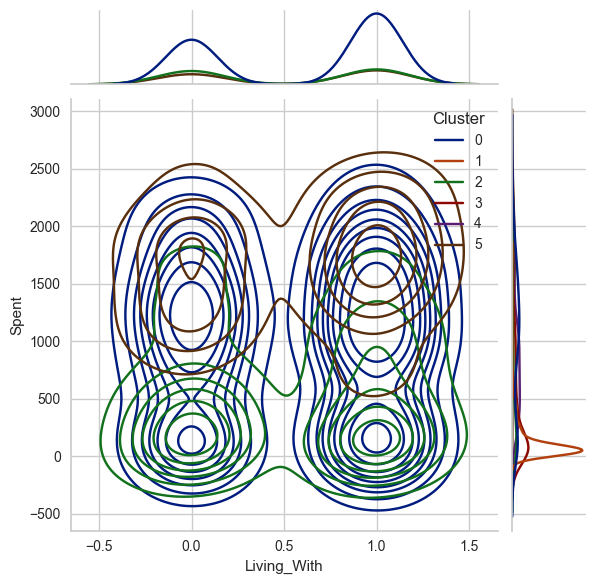

In [149]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=raw_data[i], y=raw_data["Spent"], hue =raw_data["Cluster"], kind="kde", palette='dark')
    plt.show()